<a href="https://colab.research.google.com/github/JakeOh/202504_itwill_oracle88/blob/main/python24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. 한글 폰트 설치

In [1]:
# Jupyter notebook 환경에서 리눅스 명령어를 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,017 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

## Step 2. Colab Runtime 재시작(Ctrl+M)

## Step 3. matplotlib 패키지에서 한글 폰트를 사용할 수 있도록 설정

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

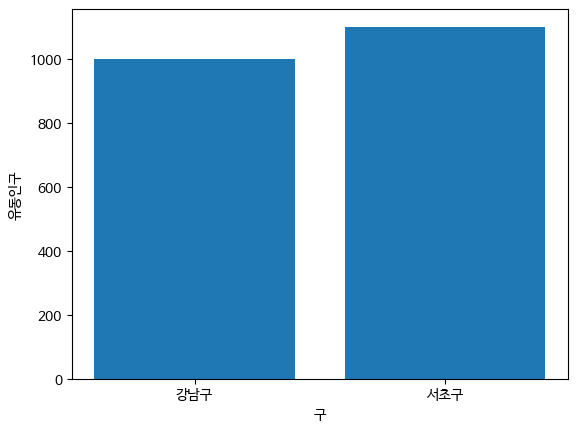

In [2]:
# 한글 폰트 테스트
import pandas as pd

df = pd.DataFrame({
    '구': ['강남구', '서초구'],
    '유동인구': [1_000, 1_100]
})

plt.bar(x=df['구'], height=df['유동인구'])
plt.xlabel('구')
plt.ylabel('유동인구')
plt.show()

# 2025년 4월 전국 아파트 실거래가 분석

*   [apt_202504.csv](https://github.com/JakeOh/202504_itwill_oracle88/raw/refs/heads/main/apt_202504.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   첫 15줄은 파일에 대한 설명 -> skip
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   202504 -> 2025, 4
*    서울특별시 아파트들의 구(county)별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    전용면적 $84 m^2$ 이상 $100 m^2$ 미만의 서울특별시 아파트들 중에서, 구(county)별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    전용면적 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

## 필요 패키지 import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터프레임 생성

In [4]:
file_path = 'https://github.com/JakeOh/202504_itwill_oracle88/raw/refs/heads/main/apt_202504.csv'

In [5]:
apt = pd.read_csv(file_path, skiprows=15, encoding='euc-kr', thousands=',')
# skiprows 파라미터: 파일에서 생략하고 넘어가는 줄 수.
# encoding 파라미터: 텍스트 파일의 인코딩 타입을 설정. (예) utf-8(Linux, MacOS), cp949(한글 Windows), euc-kr, ...
# thousands 파라미터: 숫자 자료에서 천자리 구분자가 사용되고 있을 때. (예) 10,000

In [6]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,-,3,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,-,23,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,-,22,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,-,20,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-


In [7]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        36974 non-null  int64  
 1   시군구       36974 non-null  object 
 2   번지        36973 non-null  object 
 3   본번        36974 non-null  int64  
 4   부번        36974 non-null  int64  
 5   단지명       36974 non-null  object 
 6   전용면적(㎡)   36974 non-null  float64
 7   계약년월      36974 non-null  int64  
 8   계약일       36974 non-null  int64  
 9   거래금액(만원)  36974 non-null  int64  
 10  동         36974 non-null  object 
 11  층         36974 non-null  int64  
 12  매수자       36974 non-null  object 
 13  매도자       36974 non-null  object 
 14  건축년도      36974 non-null  int64  
 15  도로명       36974 non-null  object 
 16  해제사유발생일   36974 non-null  object 
 17  거래유형      36974 non-null  object 
 18  중개사소재지    36974 non-null  object 
 19  등기일자      36974 non-null  object 
dtypes: float64(1), int64(8), obj

In [8]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000


## 데이터 탐색 시각화

### 아파트 전용면적 분포 시각화

In [9]:
apt['전용면적(㎡)'].describe()

,전용면적(㎡)
count,36974.000000
mean,73.912814
std,22.468251
min,12.210000
25%,59.840000
50%,75.532800
75%,84.950000
max,244.470000


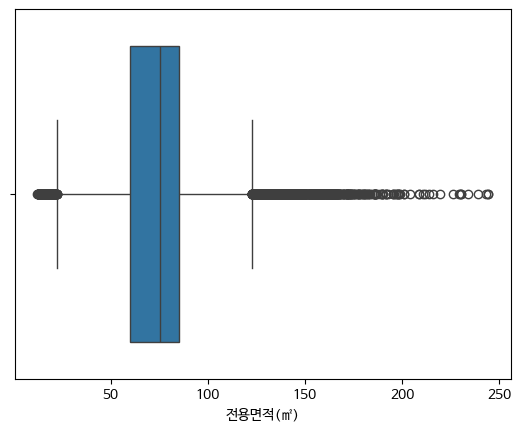

In [10]:
sns.boxplot(data=apt, x='전용면적(㎡)')
plt.show()

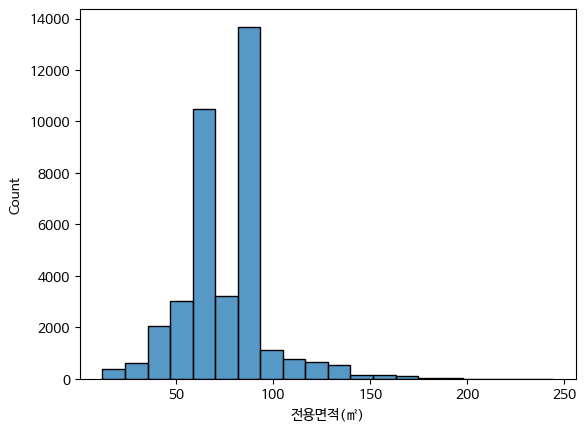

In [11]:
sns.histplot(data=apt, x='전용면적(㎡)', bins=20)
plt.show()

### 거래금액 분포 시각화

In [12]:
apt['거래금액(만원)'].describe()

,거래금액(만원)
count,3.697400e+04
mean,4.348493e+04
std,4.163910e+04
min,1.200000e+03
25%,1.820000e+04
50%,3.370000e+04
75%,5.550000e+04
max,1.050000e+06


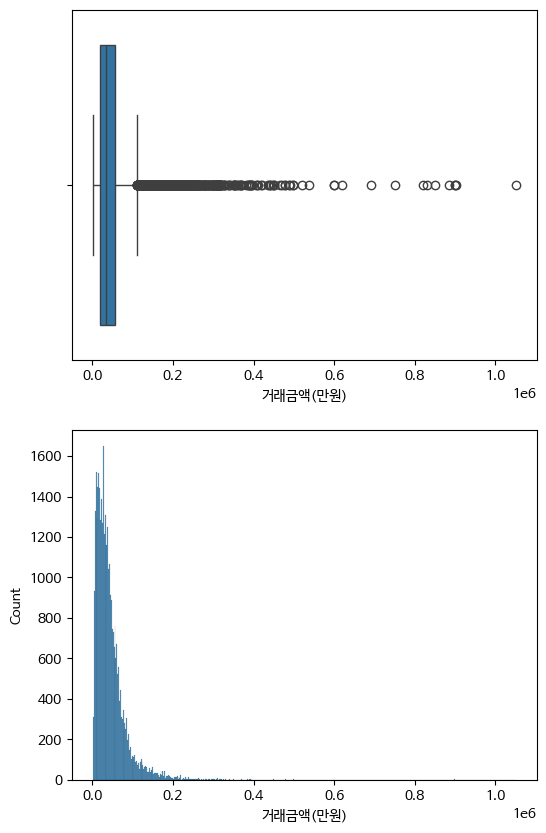

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))

sns.boxplot(data=apt, x='거래금액(만원)', ax=axes[0])
sns.histplot(data=apt, x='거래금액(만원)', ax=axes[1])

plt.show()

### 거래유형 빈도수

In [14]:
apt['거래유형'].value_counts()

,count
거래유형,
중개거래,33765
직거래,3209


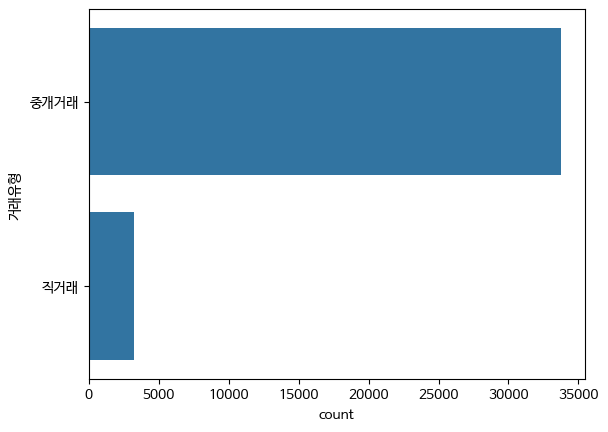

In [15]:
sns.countplot(data=apt, y='거래유형')
plt.show()

### 실거래가 최댓값, 최솟값 아파트

In [16]:
apt[(apt['거래금액(만원)'] == apt['거래금액(만원)'].max()) | (apt['거래금액(만원)'] == apt['거래금액(만원)'].min())]

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
7430,7431,서울특별시 강남구 압구정동,369-1,369,1,"현대2차(10,11,20,23,24,25동)",198.41,202504,23,1050000,-,9,개인,개인,1976,압구정로29길 71,-,중개거래,서울 강남구,-
7698,7699,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,23,1200,-,3,개인,개인,1997,동신길 70,-,직거래,-,-
9811,9812,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,21,1200,-,3,개인,개인,1997,동신길 70,-,직거래,-,25.04.29


## 파생변수 추가

### 광역시도(province), 시군구(county)

In [17]:
apt['province'] = apt['시군구'].str.split().str[0]

In [18]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,3,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-,인천광역시
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,23,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,22,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-,인천광역시
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,15,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,20,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시


In [19]:
apt['county'] = apt['시군구'].str.split().str[1]

In [20]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,개인,개인,1983,길주남로90번길 45,-,중개거래,인천 부평구,-,인천광역시,부평구
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,개인,개인,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,개인,개인,2021,염전로 414,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시,동대문구


### 광역시도별 아파트 매매 건수

In [21]:
province_counts = apt.province.value_counts().sort_values()
province_counts

,count
province,
제주특별자치도,171
대전광역시,1182
전라남도,1184
광주광역시,1266
세종특별자치시,1271
강원특별자치도,1273
울산광역시,1371
전북특별자치도,1596
충청북도,1630


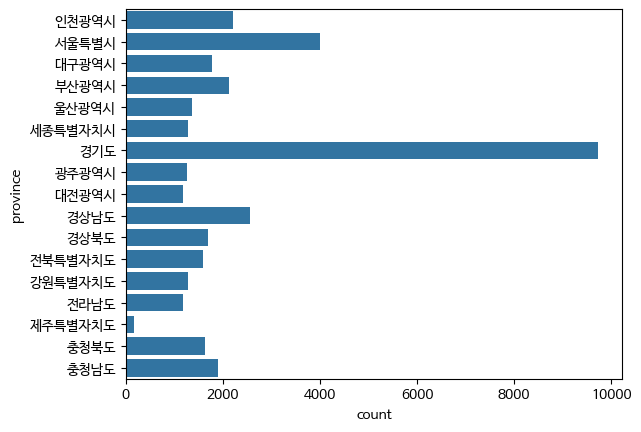

In [22]:
sns.countplot(data=apt, y='province')
plt.show()

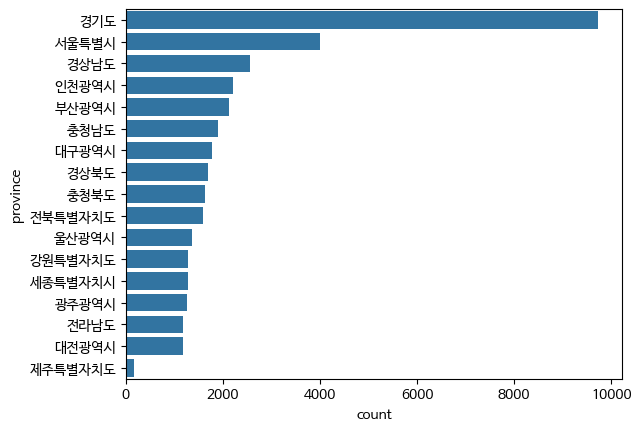

In [23]:
sns.countplot(data=apt, y='province', order=apt.province.value_counts().index)
plt.show()

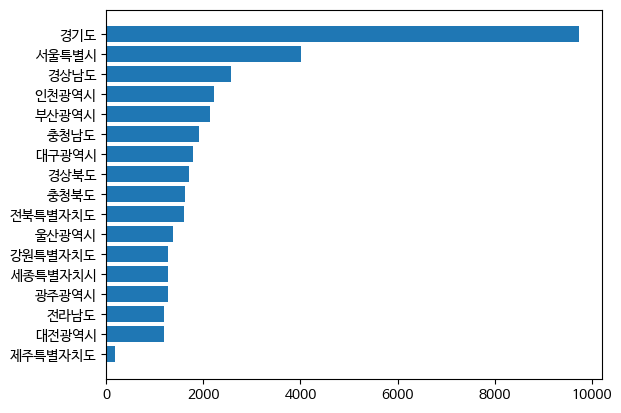

In [24]:
plt.barh(y=province_counts.index, width=province_counts)
plt.show()

In [25]:
apt.county.unique()

array(['부평구', '미추홀구', '성동구', '동대문구', '달서구', '달성군', '송파구', '중구', '북구',
       '영등포구', '강북구', '사하구', '수성구', '노원구', '해운대구', '연제구', '기장군', '동작구',
       '강동구', '은평구', '동구', '관악구', '사상구', '강남구', '남동구', '양천구', '서초구',
       '구로구', '영도구', '남구', '동래구', '서구', '연수구', '강서구', '부산진구', '계양구',
       '성북구', '도봉구', '마포구', '금정구', '서대문구', '중랑구', '아름동', '평택시', '조치원읍',
       '광산구', '부천시', '안산시', '유성구', '새롬동', '수원시', '대덕구', '안양시', '울주군',
       '성남시', '고양시', '의정부시', '다정동', '강화군', '도담동', '동두천시', '종촌동', '집현동',
       '김해시', '포항시', '군산시', '익산시', '양산시', '원주시', '영월군', '삼척시', '창원시',
       '창녕군', '예천군', '전주시', '칠곡군', '속초시', '순천시', '평창군', '경산시', '태백시',
       '고성군', '동해시', '제주시', '진주시', '나주시', '영천시', '완주군', '횡성군', '함안군',
       '서귀포시', '춘천시', '강릉시', '영주시', '김제시', '구미시', '홍천군', '광양시', '남원시',
       '거제시', '정읍시', '고흥군', '통영시', '안동시', '사천시', '김천시', '해남군', '영암군',
       '무안군', '경주시', '영광군', '완도군', '밀양시', '오산시', '청주시', '이천시', '천안시',
       '남양주시', '김포시', '양주시', '용인시', '당진시', '안성시', '군포시', '화성시', '홍성군',
       '계룡시', 

### 계약년(year), 계약월(month)

In [ ]:
apt['year'] = apt['계약년월'] // 100
apt['month'] = apt['계약년월'] % 100

In [ ]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county,year,month
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,1983,길주남로90번길 45,-,중개거래,인천 부평구,-,인천광역시,부평구,2025,4
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구,2025,4
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,2021,염전로 414,-,중개거래,인천 미추홀구,-,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구,2025,4
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시,동대문구,2025,4


## 서울시 구별 아파트 거래 분석

In [26]:
# seoul_apt = apt[apt.province == '서울특별시']
seoul_apt = apt[apt.province.str.startswith('서울')]

In [27]:
seoul_apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.930,202504,30,73850,...,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.950,202504,30,86200,...,개인,개인,1997,제기로 131,-,중개거래,서울 동대문구,-,서울특별시,동대문구
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.820,202504,30,262000,...,개인,개인,2006,잠실로 88,-,중개거래,"서울 광진구, 서울 송파구",-,서울특별시,송파구
10,11,서울특별시 영등포구 당산동4가,98,98,0,브라운스톤당산,84.025,202504,30,122000,...,개인,개인,2015,영신로55길 8,-,중개거래,"서울 마포구, 서울 영등포구",25.04.30,서울특별시,영등포구
11,12,서울특별시 동대문구 답십리동,1003,1003,0,래미안위브,59.960,202504,30,125800,...,개인,개인,2014,답십리로 130,-,중개거래,서울 동대문구,-,서울특별시,동대문구


In [28]:
seoul_apt.tail()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county
36610,36611,서울특별시 구로구 고척동,334,334,0,벽산,84.878,202504,1,90500,...,개인,개인,2003,경인로 390,-,중개거래,서울 구로구,-,서울특별시,구로구
36612,36613,서울특별시 구로구 개봉동,480,480,0,현대홈타운,84.915,202504,1,77500,...,개인,개인,2001,개봉로20길 158,-,중개거래,서울 구로구,-,서울특별시,구로구
36617,36618,서울특별시 동대문구 답십리동,41,41,0,동서울한양,76.410,202504,1,65000,...,개인,개인,1989,답십리로 184,-,중개거래,서울 동대문구,-,서울특별시,동대문구
36627,36628,서울특별시 마포구 성산동,601,601,0,성산월드타운대림,84.689,202504,1,96000,...,개인,개인,2004,월드컵북로30길 9-22,-,중개거래,서울 마포구,-,서울특별시,마포구
36633,36634,서울특별시 양천구 신월동,1078,1078,0,목동센트럴아이파크위브4단지,84.970,202504,1,118500,...,개인,개인,2020,남부순환로83길 47,-,중개거래,서울 양천구,25.04.30,서울특별시,양천구


In [29]:
# 구별 매매건수, 거래금액 평균, 최댓값, 최솟값
seoul_apt.groupby(by='county')['거래금액(만원)'].agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
county,,,,
강남구,58,398812.068966,1050000,16000
강동구,237,112508.016878,233000,10200
강북구,77,67638.311688,112000,8500
강서구,242,84419.214876,201000,9500
관악구,150,79354.666667,125000,10300
광진구,116,128171.293103,317000,13900
구로구,208,70238.942308,165000,10700
금천구,47,62259.574468,115500,8900
노원구,308,59265.746753,144000,29500


In [30]:
seoul_by_county = seoul_apt.pivot_table(values='거래금액(만원)', index='county', aggfunc=['count', 'mean', 'min', 'max'])
seoul_by_county

,count,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
county,,,,
강남구,58,398812.068966,16000,1050000
강동구,237,112508.016878,10200,233000
강북구,77,67638.311688,8500,112000
강서구,242,84419.214876,9500,201000
관악구,150,79354.666667,10300,125000
광진구,116,128171.293103,13900,317000
구로구,208,70238.942308,10700,165000
금천구,47,62259.574468,8900,115500


### 서울에서 거래건수가 많은 상위 10개 구의 거래금액 평균, 최솟값, 최댓값

In [31]:
seoul_by_county

,count,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
county,,,,
강남구,58,398812.068966,16000,1050000
강동구,237,112508.016878,10200,233000
강북구,77,67638.311688,8500,112000
강서구,242,84419.214876,9500,201000
관악구,150,79354.666667,10300,125000
광진구,116,128171.293103,13900,317000
구로구,208,70238.942308,10700,165000
금천구,47,62259.574468,8900,115500


In [35]:
seoul_top10_count = seoul_by_county.sort_values(by=('count', '거래금액(만원)'), ascending=False).head(10)
seoul_top10_count

,count,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
county,,,,
노원구,308,59265.746753,29500,144000
동대문구,263,65352.661597,9000,175500
양천구,259,147008.108108,39000,345000
마포구,253,141033.754941,17000,279500
성동구,253,151408.300395,13000,900000
동작구,252,125075.000000,12000,360000
성북구,252,83057.341270,43000,185000
영등포구,248,140505.447581,9500,488200


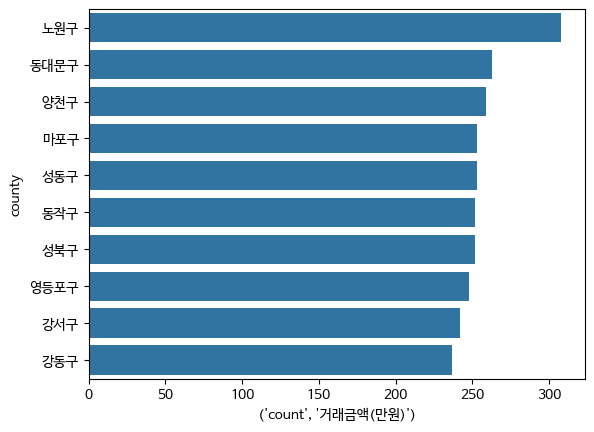

In [36]:
sns.barplot(data=seoul_top10_count, x=('count', '거래금액(만원)'), y=seoul_top10_count.index)
plt.show()

### 서울에서 구별 아파트 실거래가 평균 상위 10개 구의 거래건수, 거래금액 평균, 최솟값, 최댓값

In [37]:
seoul_top10_mean = seoul_by_county.sort_values(by=('mean', '거래금액(만원)'), ascending=False).head(10)
seoul_top10_mean

,count,mean,min,max
,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
county,,,,
강남구,58,398812.068966,16000,1050000
서초구,12,198075.000000,30000,490000
용산구,18,173538.888889,54000,443000
송파구,76,169609.868421,22200,407500
성동구,253,151408.300395,13000,900000
양천구,259,147008.108108,39000,345000
마포구,253,141033.754941,17000,279500
영등포구,248,140505.447581,9500,488200


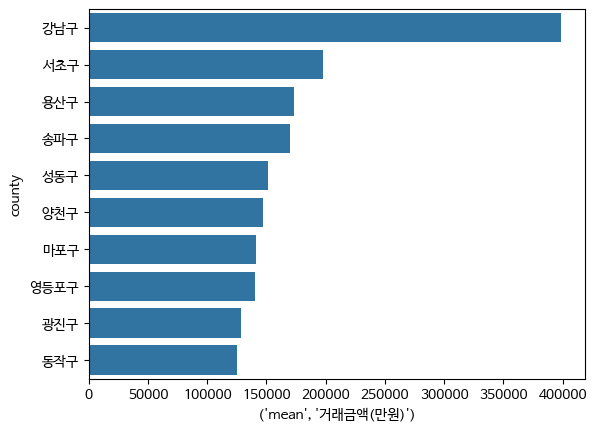

In [38]:
sns.barplot(data=seoul_top10_mean, x=('mean', '거래금액(만원)'), y=seoul_top10_mean.index)
plt.show()

## 광역시도별 아파트 거래 분석

In [39]:
by_province = apt.groupby(by='province')['거래금액(만원)'].agg(['count', 'mean', 'min', 'max'])
by_province

,count,mean,min,max
province,,,,
강원특별자치도,1273,21880.036921,1500,95000
경기도,9733,51585.387342,3000,369000
경상남도,2559,24180.064088,1500,166000
경상북도,1701,18005.839506,1500,72000
광주광역시,1266,29210.827014,3650,168000
대구광역시,1780,33990.820787,2900,247500
대전광역시,1182,34653.980541,3480,210000
부산광역시,2134,39717.544049,2300,498000
서울특별시,4004,106616.144106,8500,1050000


### 아파트 거래 건수 상위 5개 광역시도

In [46]:
top5_count_by_province = by_province.sort_values(by='count', ascending=False).head(5)
top5_count_by_province

,count,mean,min,max
province,,,,
경기도,9733,51585.387342,3000,369000
서울특별시,4004,106616.144106,8500,1050000
경상남도,2559,24180.064088,1500,166000
인천광역시,2212,38335.469711,3800,184000
부산광역시,2134,39717.544049,2300,498000


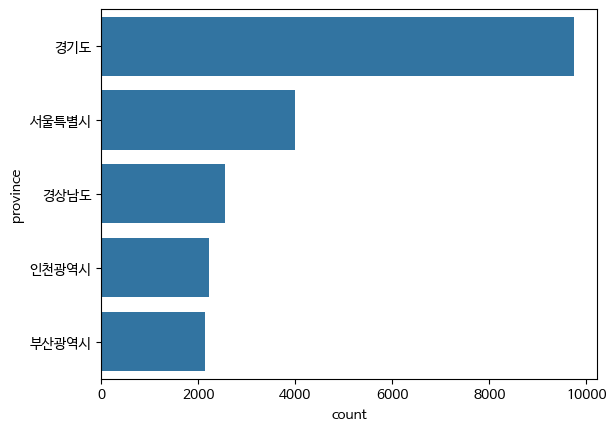

In [41]:
sns.barplot(data=top5_count_by_province, x='count', y='province')
plt.show()

### 실거래가 평균 상위 5개 광역시도

In [42]:
top5_mean_by_province = by_province.sort_values(by='mean', ascending=False).head(5)
top5_mean_by_province

,count,mean,min,max
province,,,,
서울특별시,4004,106616.144106,8500,1050000
세종특별자치시,1271,51731.077891,2900,205000
경기도,9733,51585.387342,3000,369000
부산광역시,2134,39717.544049,2300,498000
인천광역시,2212,38335.469711,3800,184000


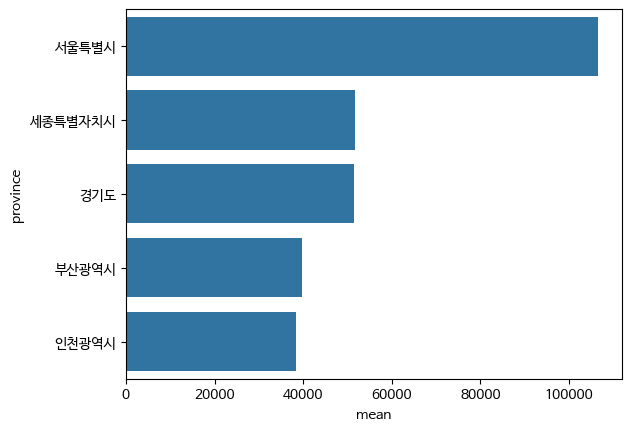

In [43]:
sns.barplot(data=top5_mean_by_province, x='mean', y='province')
plt.show()

## 전용면적 $84 m^2$ 이상 $100 m^2$ 미만의 서울특별시 아파트

In [50]:
seoul_midsize_apt = seoul_apt[(seoul_apt['전용면적(㎡)'] >= 84) & (seoul_apt['전용면적(㎡)'] < 100)]
seoul_midsize_apt

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,county
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,개인,개인,1986,마장로42길 16,-,직거래,-,25.04.30,서울특별시,성동구
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.8200,202504,30,262000,...,개인,개인,2006,잠실로 88,-,중개거래,"서울 광진구, 서울 송파구",-,서울특별시,송파구
10,11,서울특별시 영등포구 당산동4가,98,98,0,브라운스톤당산,84.0250,202504,30,122000,...,개인,개인,2015,영신로55길 8,-,중개거래,"서울 마포구, 서울 영등포구",25.04.30,서울특별시,영등포구
13,14,서울특별시 강북구 미아동,1353,1353,0,에스케이북한산시티,84.7600,202504,30,72000,...,개인,개인,2004,솔샘로 174,-,중개거래,서울 강북구,-,서울특별시,강북구
28,29,서울특별시 동작구 흑석동,339,339,0,흑석한강센트레빌Ⅱ,84.9460,202504,30,172000,...,개인,개인,2012,서달로 91,-,중개거래,서울 동작구,-,서울특별시,동작구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36607,36608,서울특별시 동대문구 용두동,794,794,0,용두롯데캐슬리치,84.5011,202504,1,90000,...,개인,개인,2015,한빛로 73,-,중개거래,인천 중구,-,서울특별시,동대문구
36610,36611,서울특별시 구로구 고척동,334,334,0,벽산,84.8780,202504,1,90500,...,개인,개인,2003,경인로 390,-,중개거래,서울 구로구,-,서울특별시,구로구
36612,36613,서울특별시 구로구 개봉동,480,480,0,현대홈타운,84.9150,202504,1,77500,...,개인,개인,2001,개봉로20길 158,-,중개거래,서울 구로구,-,서울특별시,구로구
36627,36628,서울특별시 마포구 성산동,601,601,0,성산월드타운대림,84.6890,202504,1,96000,...,개인,개인,2004,월드컵북로30길 9-22,-,중개거래,서울 마포구,-,서울특별시,마포구


In [51]:
seoul_midsize_by_county = seoul_midsize_apt.groupby(by='county')['거래금액(만원)'].agg(['count', 'mean', 'min', 'max'])
seoul_midsize_by_county

,count,mean,min,max
county,,,,
강남구,10,273350.000000,140000,381000
강동구,81,121548.148148,59700,204000
강북구,28,74869.642857,44000,96750
강서구,67,103374.626866,48500,151000
관악구,56,89050.000000,50000,125000
광진구,42,140078.571429,58000,205000
구로구,74,79764.864865,45000,158000
금천구,18,73416.666667,48000,115500
노원구,60,79140.000000,49000,122000


### 거래수 상위 10개 구

In [53]:
seoul_midsize_top10_count = seoul_midsize_by_county.sort_values(by='count', ascending=False).head(10)
seoul_midsize_top10_count

,count,mean,min,max
county,,,,
동작구,120,131688.750000,65000,285000
성동구,109,160834.862385,73850,244000
마포구,99,154488.888889,64500,251500
성북구,92,92389.130435,50250,154000
서대문구,84,108011.904762,44000,191000
강동구,81,121548.148148,59700,204000
영등포구,75,130525.333333,70000,324000
구로구,74,79764.864865,45000,158000
강서구,67,103374.626866,48500,151000


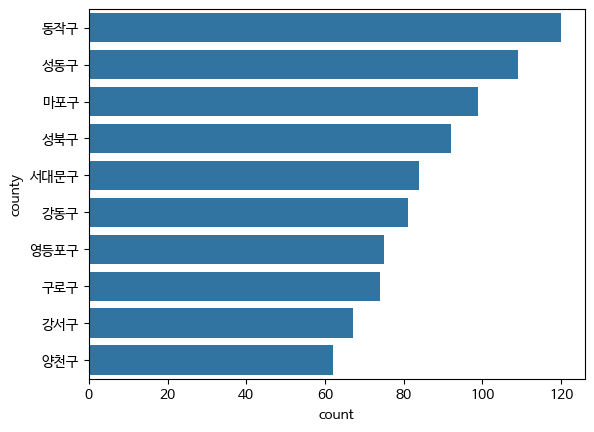

In [57]:
sns.barplot(data=seoul_midsize_top10_count, x='count', y='county')
plt.show()

### 실거래가 상위 10개 구

In [58]:
seoul_midsize_top10_mean = seoul_midsize_by_county.sort_values(by='mean', ascending=False).head(10)
seoul_midsize_top10_mean

,count,mean,min,max
county,,,,
강남구,10,273350.000000,140000,381000
용산구,6,172916.666667,127000,209500
송파구,31,166248.709677,99000,275000
성동구,109,160834.862385,73850,244000
마포구,99,154488.888889,64500,251500
양천구,62,150044.354839,50500,265000
광진구,42,140078.571429,58000,205000
동작구,120,131688.750000,65000,285000
영등포구,75,130525.333333,70000,324000


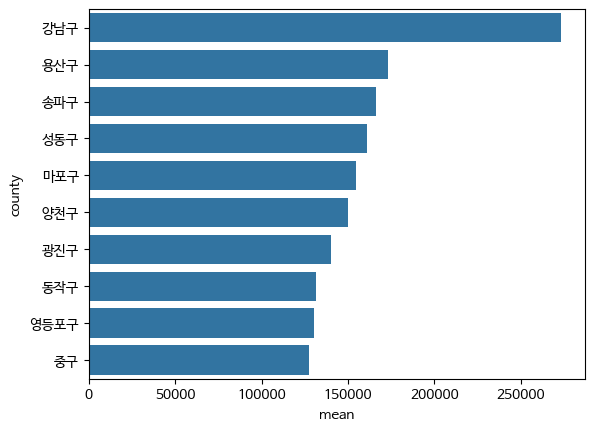

In [59]:
sns.barplot(data=seoul_midsize_top10_mean, x='mean', y='county')
plt.show()